In [142]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as sit

In [576]:
x = [0.0,0.3,0.5,0.7,1.0,1.25,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0,6.5,7.0,7.5,8.0,8.5,9.0,9.5,10.0,10.5,11.0,12.0,14.0,15.0,16.0,17.0,18.0]
y = [12.95,12.1,11.55,11.05,10.5,10.0,9.65,9.1,8.55,8.1,7.75,7.4,7.18,6.95,6.7,6.52,6.4,6.2,6.05,5.9,5.78,5.6,5.5,5.42,5.32,5.25,5.05,4.79,4.7,4.57,4.5,4.4]

In [577]:
para = np.polyfit(x,y,8)
poly = np.poly1d(para)
xp = np.linspace(0., 18, 180)

yscale =  106/14.2
ytic = np.arange(0, 120, 10)
ys = ytic / yscale
xscale =  0.5/1
xtic = np.arange(0, 10, 1)
xs = xtic / xscale

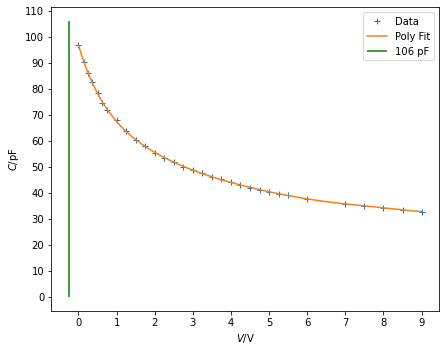

In [580]:
plt.figure(figsize=(6.3,5))
plt.plot(x,y,'+',label='Data')
plt.plot(xp,poly(xp),label='Poly Fit')
# plt.plot(xp,fx(xp),label='Poly Fit')

plt.vlines(-0.5,0,14.2,'g',label='106 pF')
plt.yticks(ys,ytic)
plt.xticks(xs,xtic)
plt.ylabel('$C/$pF')
plt.xlabel('$V$/V')
plt.legend()
plt.tight_layout()
plt.savefig('pic/fit.pdf')

In [526]:
a = 0.00503 ## unit: cm^2
ee = 11.8*8.854*10**(-2)
eq = 1.602

v = np.arange(0,8.6,0.1) ## unit: Volt
xx = v/xscale
yy = poly(xx)
polyde = np.polyder(poly)
dyx = polyde(xx)

c = yy*yscale ## unit: pF
c21 = 1/c**2
dcv = dyx*yscale/xscale

dyy = np.array(y[:-1])
ddyx = []
for i in range(len(y)-1):
    ddyx.append((y[i+1]-y[i])/(x[i+1]-x[i]))
dc = dyy*yscale
dv = np.array(x[:-1])*xscale
ddcv = np.array(ddyx)*yscale/xscale

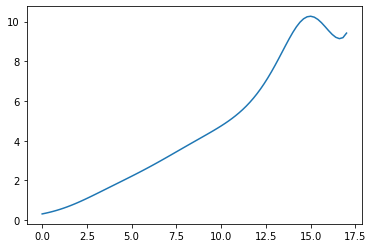

In [527]:
plt.plot(xx,-1/dyx)

In [519]:
w = ee*a/c ## unit:cm
nw = -(c*c)/(w*a*dcv*eq)

dw = ee*a/dc ## unit:cm
dnw = -(dc*dc)/(dw*a*ddcv*eq)

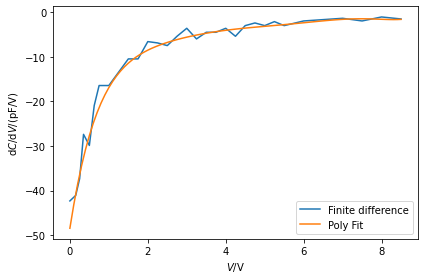

In [571]:
plt.plot(dv,ddcv,label='Finite difference')
plt.plot(v,dcv,label="Poly Fit")
plt.xlabel('$V/$V')
plt.ylabel('d$C$/d$V$/(pF/V)')
plt.legend()
plt.tight_layout()
plt.savefig('pic/de.pdf')

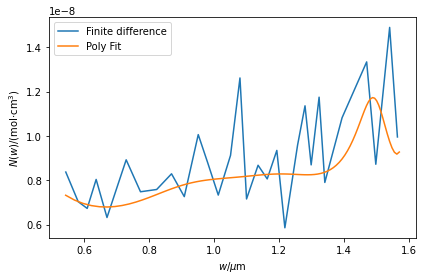

In [573]:
plt.plot(dw*10**(4),dnw*1.66*10**(-17),label='Finite difference') ## unit: μm-mol/cm^3
plt.plot(w*10**(4),nw*1.66*10**(-17),label="Poly Fit") ## unit: μm-mol/cm^3
plt.xlabel('$w/\mu$m')
plt.ylabel('$N(w)$/(mol$\cdot$cm$^3)$')
plt.legend()
plt.tight_layout()
plt.savefig('pic/nw.pdf')

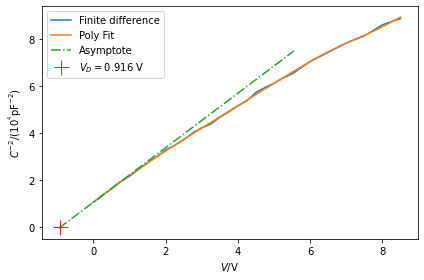

In [572]:
plt.plot(dv,(100/dc)**2,label='Finite difference')
plt.plot(v,(100/c)**2,label="Poly Fit")

assy = np.polyfit(dv[:6],((100/dc)**2)[:6],1)

xa = np.linspace(-0.95, 5.55,5160)
plt.plot(xa,np.poly1d(assy)(xa),'-.',label='Asymptote')
plt.plot(-assy[1]/assy[0],0,'+',ms=15,label='$V_D=$0.916 V')
plt.xlabel('$V/$V')
plt.ylabel('$C^{-2}$/($10^{^4}$pF$^{-2})$')
plt.legend()
plt.tight_layout()
plt.savefig('pic/vd.pdf')

In [597]:
for i in range(len(dv)):
    print('%.2f & %.2f &%.2f &$%.2f$ &%.2f &%.2e\\\\'%(dv[i],dc[i],1/(dc[i]*dc[i])*10000, ddcv[i],dw[i]*10000,dnw[i]*1.66*10**(-17)))

0.00 & 96.67 &1.07 &$-42.30$ &0.54 &8.37e-09\\
0.15 & 90.32 &1.23 &$-41.06$ &0.58 &7.04e-09\\
0.25 & 86.22 &1.35 &$-37.32$ &0.61 &6.73e-09\\
0.35 & 82.49 &1.47 &$-27.37$ &0.64 &8.04e-09\\
0.50 & 78.38 &1.63 &$-29.86$ &0.67 &6.32e-09\\
0.62 & 74.65 &1.79 &$-20.90$ &0.70 &7.80e-09\\
0.75 & 72.04 &1.93 &$-16.42$ &0.73 &8.92e-09\\
1.00 & 67.93 &2.17 &$-16.42$ &0.77 &7.48e-09\\
1.25 & 63.82 &2.45 &$-13.44$ &0.82 &7.58e-09\\
1.50 & 60.46 &2.74 &$-10.45$ &0.87 &8.29e-09\\
1.75 & 57.85 &2.99 &$-10.45$ &0.91 &7.26e-09\\
2.00 & 55.24 &3.28 &$-6.57$ &0.95 &1.01e-08\\
2.25 & 53.60 &3.48 &$-6.87$ &0.98 &8.79e-09\\
2.50 & 51.88 &3.72 &$-7.46$ &1.01 &7.33e-09\\
2.75 & 50.01 &4.00 &$-5.37$ &1.05 &9.12e-09\\
3.00 & 48.67 &4.22 &$-3.58$ &1.08 &1.26e-08\\
3.25 & 47.77 &4.38 &$-5.97$ &1.10 &7.16e-09\\
3.50 & 46.28 &4.67 &$-4.48$ &1.14 &8.68e-09\\
3.75 & 45.16 &4.90 &$-4.48$ &1.16 &8.06e-09\\
4.00 & 44.04 &5.16 &$-3.58$ &1.19 &9.35e-09\\
4.25 & 43.15 &5.37 &$-5.37$ &1.22 &5.86e-09\\
4.50 & 41.80 &5.72 &$-2